In [5]:
pip install matplotlib seaborn pillow kaggle

In [7]:
### Download data from Kaggle
### Source : https://www.kaggle.com/discussions/general/74235


from google.colab import files


uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d michaeljkerr/20k-album-covers-within-20-genres

import zipfile
import os


zip_file_name = '20k-album-covers-within-20-genres.zip'

extracted_dir = 'dataset'
os.makedirs(extracted_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print(f'Dataset extracted to {extracted_dir}')


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/michaeljkerr/20k-album-covers-within-20-genres
License(s): unknown
 93% 211M/226M [00:01<00:00, 198MB/s]
100% 226M/226M [00:01<00:00, 200MB/s]
Dataset extracted to dataset


In [9]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

###Paths
input_folder = 'dataset/GAID/'
genres = os.listdir(input_folder)


genre_counts = {}
aspect_ratios = []
brightness_values = []
color_histograms = {}



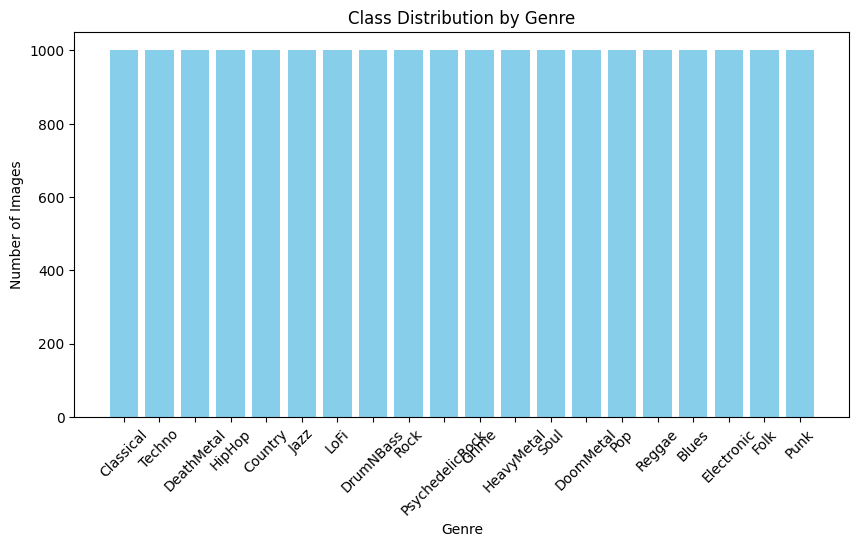

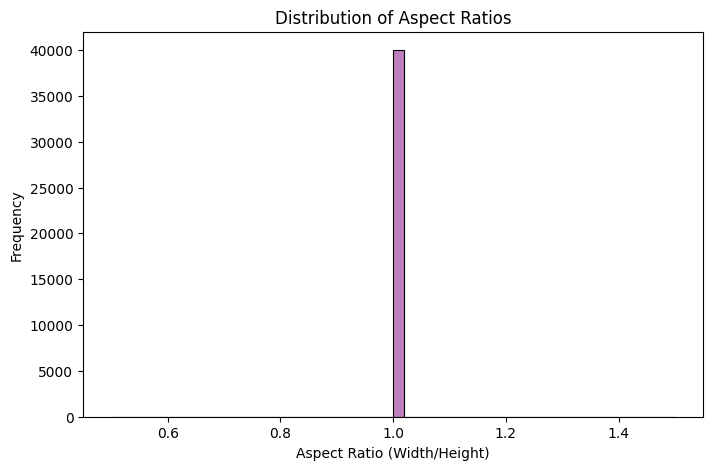

In [12]:
###Data collection
for genre in genres:
    genre_folder = os.path.join(input_folder, genre)
    image_files = os.listdir(genre_folder)
    genre_counts[genre] = len(image_files)

    for img_file in image_files:
        img_path = os.path.join(genre_folder, img_file)
        with Image.open(img_path) as img:
            ###Get aspect ratio
            width, height = img.size
            aspect_ratio = width / height
            aspect_ratios.append(aspect_ratio)

###Class Distribution
plt.figure(figsize=(10, 5))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xticks(rotation=45)
plt.title('Class Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Images')
plt.show()

###Aspect Ratio Distribution
plt.figure(figsize=(8, 5))
sns.histplot(aspect_ratios, bins=50, kde=True, color='purple')
plt.title('Distribution of Aspect Ratios')
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Frequency')
plt.show()

**Insights**

*   Data Balanced ( Before Cleansing )
*   Mutual Aspect Ration



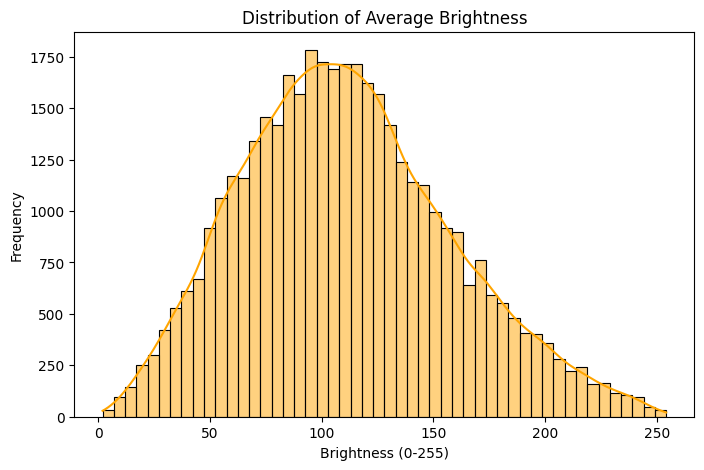

In [13]:
###Data collection
for genre in genres:
    genre_folder = os.path.join(input_folder, genre)
    image_files = os.listdir(genre_folder)
    genre_counts[genre] = len(image_files)

    for img_file in image_files:
        img_path = os.path.join(genre_folder, img_file)
        with Image.open(img_path) as img:
            ###Get brightness
            gray_img = img.convert('L')
            brightness = np.array(gray_img).mean()  ###Mean pixel value in grayscale
            brightness_values.append(brightness)

###Brightness Distribution
plt.figure(figsize=(8, 5))
sns.histplot(brightness_values, bins=50, kde=True, color='orange')
plt.title('Distribution of Average Brightness')
plt.xlabel('Brightness (0-255)')
plt.ylabel('Frequency')
plt.show()



**Insights**

*   Brightness Distribution is Near-Normal (Bell Curve)
*   Most Album Covers Have Moderate Brightness
*   Few Extremes in Brightness



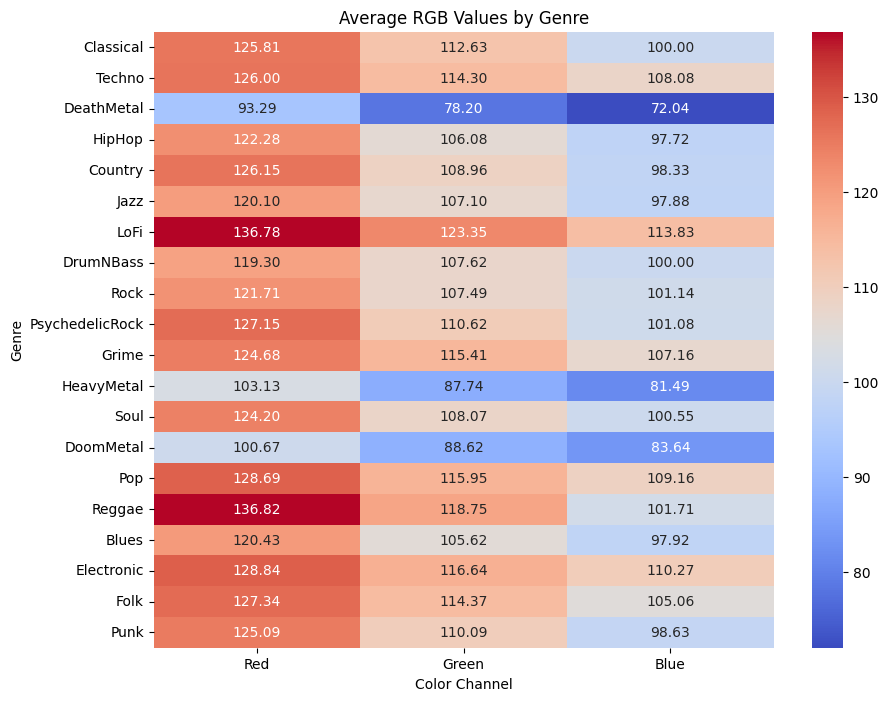

In [14]:
###Data collection
for genre in genres:
    genre_folder = os.path.join(input_folder, genre)
    image_files = os.listdir(genre_folder)
    genre_counts[genre] = len(image_files)

    for img_file in image_files:
        img_path = os.path.join(genre_folder, img_file)
        with Image.open(img_path) as img:
            ###Collect color histogram data
            img_array = np.array(img)
            if genre not in color_histograms:
                color_histograms[genre] = []
            color_histograms[genre].append(np.mean(img_array, axis=(0, 1)))  ###Mean RGB values

###Color Histogram Heatmap
average_colors = {genre: np.mean(color_histograms[genre], axis=0) for genre in genres}
color_matrix = np.array([average_colors[genre] for genre in genres])

plt.figure(figsize=(10, 8))
sns.heatmap(color_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=['Red', 'Green', 'Blue'], yticklabels=genres)
plt.title('Average RGB Values by Genre')
plt.xlabel('Color Channel')
plt.ylabel('Genre')
plt.show()

**Insights (reflect the artistic style or mood commonly associated with genres)**

*   Red Tones ( LoFi and Reggae ) - Warm colors
*   Low RGB Values ( DeathMetal, DoomMetal, and HeavyMetal ) - Darker and more muted colors
*   Balanced Colors ( Classical, Jazz, HipHop, Rock, and Country ) - natural color palette
